<a href="https://colab.research.google.com/github/RHMalalatiana/Recombination_code/blob/main/Recombination_rate_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from data_gen_dist_rec import *
import math as mt
import random

In [4]:
list_d12=[]
list_d13=[]
list_d23=[]
list_d3rec=[]
list_d1rec=[]
n_simulation=10000
#the time divergent of the 3 species is given here
t_12=2.0
t_13=3.0
t_23=3.0
for i in range(n_simulation):
    #we define the initial genome as a sequence of a of length 500
    initial_gen='a'*500
    #here is the input tree of the form [genTime, leftBranch, RightBranch] in this case we have tree of 3 leaves
    gen_time=[1.0,[1.0,[1.0],[1.0]],[1.0]]
    #we start generating the genome sequences of the tree
    tree=generateDriver(initial_gen,gen_time)
    #here we extract the sequences generated
    seq=extract_genomes(tree)
    seq1=seq[0]
    seq3=seq[2]
    seq2=seq[1]
    #let us see the distance between them. Here d_12 should be short and d_13, d_23 should be long
    d_12=hamming_distance(seq1,seq2)
    d_23=hamming_distance(seq2,seq3)
    list_d12.append(d_12)
    list_d23.append(d_23)
    #the recombinant sequence is a recombination of the first and the third sequences
    recombination_rate=0.01
    seq_rec=simulate_recombination(seq1, seq3, recombination_rate)
    #here we compute the distance between the recombinant sequence and its parents
    d_1rec=hamming_distance(seq1,seq_rec)
    d_3rec=hamming_distance(seq3,seq_rec)
    list_d1rec.append(d_1rec)
    list_d3rec.append(d_3rec)

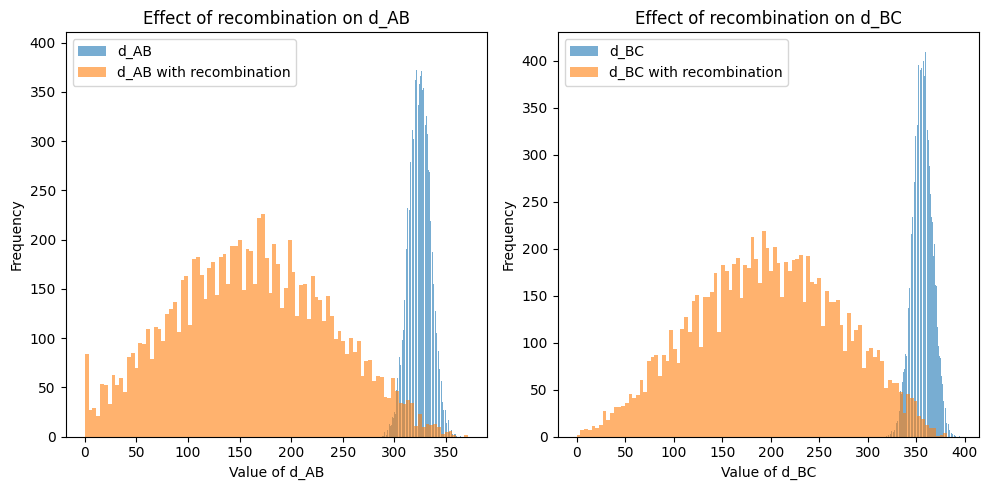

In [5]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(list_d12, bins=100, alpha=0.6, label="d_AB")
plt.hist(list_d1rec, bins=100, alpha=0.6, label="d_AB with recombination")
plt.xlabel("Value of d_AB")
plt.ylabel("Frequency")
plt.legend()
plt.title("Effect of recombination on d_AB")

plt.subplot(1, 2, 2)
plt.hist(list_d23, bins=100, alpha=0.6, label="d_BC")
plt.hist(list_d3rec, bins=100, alpha=0.6, label="d_BC with recombination")
plt.xlabel("Value of d_BC")
plt.ylabel("Frequency")
plt.legend()
plt.title("Effect of recombination on d_BC")

plt.tight_layout()
plt.show()